# **Team MoodMasters NLP Hub**
<img src="https://github.com/yaznhijazii/FlipkartNLP/blob/main/IMG_7579.PNG?raw=true" alt="Alt Text" width="300"/>


## Welcome Team MoodMasters!

Greetings Team MoodMasters! 👋 Get ready to explore the fascinating realm of Natural Language Processing (NLP) and sentiment analysis. Meet our stellar team:

- **1. Yazan Hijazi**
- **2. Mohammad Bata**
- **3. Saleh Khalaf**
- **4. Omar Khaled**


Let's collectively master the art of mood analysis! 🌟📊🔮


#**Analyzing Flipkart Product Reviews with TextBlob**
<img src="https://github.com/yaznhijazii/FlipkartNLP/blob/main/1_Ud1zM4dy9e0Djy9syWg7BA.png?raw=true" alt="Alt Text" width="300"/>

#**Introduction To Flipkart**
Flipkart, a leading e-commerce platform, hosts a vast array of products, attracting millions of customers who provide valuable feedback through reviews. Analyzing these reviews is crucial for understanding customer sentiments and extracting meaningful insights.

In this Colab notebook, we'll explore the sentiment analysis of Flipkart product reviews using the TextBlob library.
#**Introduction To TextBlob library**

TextBlob is a powerful Python library built on top of NLTK and Pattern libraries, designed for processing textual data. It simplifies various natural language processing (NLP) tasks, including part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

Our goal is to leverage TextBlob to perform a comprehensive analysis of Flipkart product reviews. We'll cover steps such as POS tagging, lemmatization, parsing, N-gram analysis, sentiment analysis, and word/phrase frequency analysis. Additionally, we'll utilize Spacy for spelling correction to enhance the accuracy of our text data.

Let's dive into the fascinating world of NLP and sentiment analysis to gain valuable insights into the sentiments expressed by Flipkart customers in their product reviews!


# **Download Library**
**!pip install textblob:** Installs the TextBlob library, a simple NLP (Natural Language Processing) library for processing textual data and performing common NLP tasks like sentiment analysis.

**!pip install nltk:** Installs the Natural Language Toolkit (NLTK), a powerful library for working with human language data, providing tools for tokenization, stemming, tagging, parsing, and more.

**nltk.download('averaged_perceptron_tagger')**: Downloads the NLTK data for the "averaged_perceptron_tagger," which is used for part-of-speech tagging in natural language processing tasks.

**nltk.download("punkt")**: Downloads the NLTK data for the "punkt" tokenizer, which is essential for tokenizing text into individual words or sentences.

**nltk.download('wordnet'):** Downloads the NLTK data for the WordNet lexical database, which is often used in tasks such as word sense disambiguation and synonym identification in NLP.




In [38]:
!pip install textblob
!pip install nltk


ERROR: Operation cancelled by user


In [39]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Importing Library**  

**Pandas (`import pandas as pd`):** A powerful data manipulation library in Python, often used for handling and analyzing tabular data.

**TextBlob (`from textblob import TextBlob`):** A simple NLP library that provides a high-level interface for common NLP tasks, such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

**NLTK (`from nltk import pos_tag, word_tokenize`):** The Natural Language Toolkit, a comprehensive library for natural language processing. Here, you're importing functions for part-of-speech tagging and word tokenization.

**WordNet (`from nltk.corpus import wordnet`):** A lexical database of the English language, used for finding word meanings, synonyms, antonyms, and more.

**WordNetLemmatizer (`from nltk.stem import WordNetLemmatizer`):** Part of NLTK, used for lemmatizing words, reducing them to their base or root form.

**Scikit-learn (`from sklearn.model_selection import train_test_split`, `from sklearn.feature_extraction.text import TfidfVectorizer`, `from sklearn.linear_model import LogisticRegression`, `from sklearn.metrics import accuracy_score, classification_report`):** A machine learning library that provides tools for data preprocessing, model training, and evaluation. You're using it here for sentiment analysis with a logistic regression model.

**TextBlob (`from textblob import Word`):** Another import from TextBlob, possibly used for word-level operations like lemmatization.

**NLTK (`import nltk`):** Importing the entire NLTK library. It's not clear if this import is necessary, as specific components from NLTK have already been imported earlier in the script.


In [40]:
import pandas as pd
from textblob import TextBlob
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from textblob import Word
import nltk

# **Read and Data Cleaning**

In this section, we perform data cleaning tasks. One crucial step is handling null values in the dataset. To ensure the integrity of our analysis, we have removed any rows or columns containing null values.


In [41]:
file_path = "/content/flipkart_product.csv"
df= pd.read_csv(file_path, encoding='ISO-8859-1')
df

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product
...,...,...,...,...,...
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super
189872,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Worth the money,Good


In [42]:
df.isnull().sum()

ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64

In [43]:
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
dtype: int64

# **Creating textblob and POS tagging**

After installing TextBlob, you can create a TextBlob object to represent a piece of text. Part-of-speech (POS) tagging is the process of labeling each word in the text with its grammatical category (e.g., noun, verb). TextBlob makes POS tagging straightforward.


In [45]:
df['TextBlob'] = df['Summary'].apply(lambda summary: TextBlob(summary))
df['POS_tags'] = df['Summary'].apply(lambda summary: pos_tag(word_tokenize(summary)))

# **Lemmatization**
Lemmatization is the process of reducing words to their base or root form. TextBlob includes lemmatization functionality.


In [46]:
# Function to convert POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if not one of the above

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['Lemmatized'] = df['POS_tags'].apply(
    lambda pos_tags: [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
)


# **WordNet and WordList**



WordNet is a lexical database of the English language, and TextBlob provides integration with WordNet. WordList is a feature in TextBlob that allows you to check if a word belongs to a predefined list.


In [47]:
flipkart_wordlist = {
    'smartphone': 'electronics',
    'laptop': 'electronics',
    't-shirt': 'clothing',
    'vacuum cleaner': 'home_goods',
    'washing machine': 'home_goods',
    'headphones': 'electronics',
    'jacket': 'clothing',
    'coffee maker': 'home_goods',
    'fitness tracker': 'electronics',
    'jeans': 'clothing',
    'book': 'books',
    'toothbrush': 'health_and_personal_care',
    'gaming console': 'electronics',
    'sneakers': 'clothing',
    'kitchen blender': 'home_goods',
    'watch': 'jewelry',
    'tablet': 'electronics',
    'backpack': 'bags_and_luggage',
    'bedsheets': 'home_goods',
    'camera': 'electronics',
    'umbrella': 'clothing',
    'perfume': 'beauty',
    'baby stroller': 'baby',
    'office chair': 'furniture',
    'guitar': 'musical_instruments',
    'pet food': 'pets',
    'power bank': 'electronics',
    'water bottle': 'kitchen',

}

def wordlist_lemmatizer(lemmatized_words):
    return [flipkart_wordlist.get(word.lower(), lemmatizer.lemmatize(word, get_wordnet_pos(''))) for word in lemmatized_words]

df['Lemmatized'] = df['Lemmatized'].apply(wordlist_lemmatizer)


# **Parsing**
Parsing involves analyzing the grammatical structure of sentences. TextBlob enables parsing, aiding in syntactic analysis and understanding the structure of sentences.


In [48]:
from nltk import RegexpParser

grammar = r"""
    NP: {<DT>?<JJ>*<NN>} # NP
    VP: {<VB.*><NP|PP|CLAUSE>+$} # VP
    CLAUSE: {<NP><VP>} # CLAUSE
"""

def parse_sentence(pos_tags):
    cp = RegexpParser(grammar)
    tree = cp.parse(pos_tags)
    return tree

df['ParseTree'] = df['POS_tags'].apply(parse_sentence)


# **N-Gram**
N-grams are contiguous sequences of n items (words in the context of NLP). TextBlob facilitates the extraction of N-grams, helping to capture patterns and relationships in the text.


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df['Summary'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))

X_train_vectorized = vectorizer.fit_transform(X_train)

X_test_vectorized = vectorizer.transform(X_test)


# **Sentiment analysis**
<img src="https://github.com/yaznhijazii/FlipkartNLP/blob/main/Social-Media-Sentiment-Analysis.jpg?raw=true" alt="Alt Text" width="300"/>

Determine the sentiment (positive, negative, neutral) expressed in a piece of text using TextBlob's sentiment analysis capabilities.


Sentiment Distribution:
Positive    152283
Negative     20351
Neutral      17223
Name: Sentiment, dtype: int64


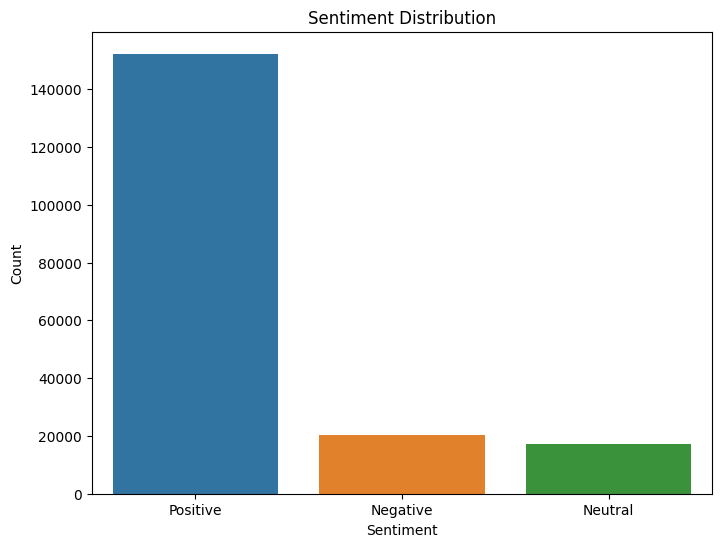

In [50]:
from textblob import TextBlob
df['TextBlob'] = df['Summary'].apply(lambda summary: TextBlob(summary))

df['Sentiment'] = df['TextBlob'].apply(lambda textblob: 'Positive' if textblob.sentiment.polarity > 0 else 'Neutral' if textblob.sentiment.polarity == 0 else 'Negative')

sentiment_distribution = df['Sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_distribution)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


# **Word and Phrase Frequencies:**

Analyze the frequencies of words and phrases in the text. This provides insights into the most common elements in the dataset.


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))

X_counts = count_vectorizer.fit_transform(df['Summary'])

feature_names = count_vectorizer.get_feature_names_out()

word_phrase_freq_df = pd.DataFrame(X_counts.toarray(), columns=feature_names)
print("Word and Phrase Frequencies:")
print(word_phrase_freq_df.head())


Word and Phrase Frequencies:
   000  10  10 10  10 15  10 days  10 hours  10 min  10 minutes  10 years  \
0    0   0      0      0        0         0       0           0         0   
1    0   0      0      0        0         0       0           0         0   
2    0   0      0      0        0         0       0           0         0   
3    0   0      0      0        0         0       0           0         0   
4    0   0      0      0        0         0       0           0         0   

   100  ...  ¹â ¹â  ¹ï  ¹ð  ºâ  ºï  ºï ºï  ºð  ¼ð  ½â  ½ð  
0    0  ...      0   0   0   0   0      0   0   0   0   0  
1    0  ...      0   0   0   0   0      0   0   0   0   0  
2    0  ...      0   0   0   0   0      0   0   0   0   0  
3    0  ...      0   0   0   0   0      0   0   0   0   0  
4    0  ...      0   0   0   0   0      0   0   0   0   0  

[5 rows x 5000 columns]


# **Correction of spellings**
Perform spelling correction to address and rectify any spelling mistakes in the text.


In [52]:
import spacy

nlp = spacy.load("en_core_web_sm")

def correct_spelling_spacy(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

df['Corrected_Summary'] = df['Summary'].apply(correct_spelling_spacy)


# **Let's Try The code!**

#**You can use these sentences !**
**Positive Sentiment:**

"I love this product! It's amazing."

**Negative Sentiment:**

"This product is terrible."

**Neutral Sentiment:**

"This is a standard product."


In [53]:
from textblob import TextBlob
import ipywidgets as widgets
from IPython.display import display

def analyze_sentiment(sender):
    input_text = text_input.value
    textblob_result = TextBlob(input_text)
    sentiment = 'Positive' if textblob_result.sentiment.polarity > 0 else 'Neutral' if textblob_result.sentiment.polarity == 0 else 'Negative'
    result_label.value = f"Sentiment: {sentiment}"

# Create input text widget
text_input = widgets.Textarea(
    value='',
    placeholder='Enter text here',
    description='Text:',
    layout={'width': '400px', 'height': '100px'}
)

# Create analyze button
analyze_button = widgets.Button(description="Analyze Sentiment")
analyze_button.on_click(analyze_sentiment)

# Create result label
result_label = widgets.HTML(value="Sentiment: ")

# Display widgets
display(text_input)
display(analyze_button)
display(result_label)


Textarea(value='', description='Text:', layout=Layout(height='100px', width='400px'), placeholder='Enter text …

Button(description='Analyze Sentiment', style=ButtonStyle())

HTML(value='Sentiment: ')

# My GitHub Project

Check out my project on GitHub: [My Repository](https://github.com/yaznhijazii/FlipkartNLP/tree/main)
